In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

from sklearn.preprocessing import LabelEncoder

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [ ]:
df = '/content/drive/MyDrive/DataSet/total_income.csv'
data = pd.read_csv(df, sep=',', encoding='cp949')
data

,학력별,성별,연령,경력구분,2022,2022.1,2022.2,2022.3,2022.4,2022.5
0,학력별,성별,연령,경력구분,월임금총액 (천원),월급여액 (천원),전년도연간특별급여/12개월 (천원),전년도 연간특별급여 (천원),총근로시간 (시간),근로자수 (명)
1,전학력,전체,전체,전경력,"4,091","3,616",475,"5,700",166.0,"11,686,935"
2,NaN,NaN,NaN,1년미만,"2,514","2,496",19,223,157.0,"1,195,292"
3,NaN,NaN,NaN,1~3년미만,"2,915","2,736",179,"2,147",162.8,"1,964,455"
4,NaN,NaN,NaN,3~5년미만,"3,272","2,994",278,"3,330",167.0,"1,618,427"
...,...,...,...,...,...,...,...,...,...,...
916,NaN,NaN,NaN,1년미만,"2,008","2,007",1,13,126.8,"4,039"
917,NaN,NaN,NaN,1~3년미만,"2,320","2,274",46,556,129.8,"7,999"
918,NaN,NaN,NaN,3~5년미만,"2,533","2,472",61,729,136.7,"5,980"
919,NaN,NaN,NaN,5~10년미만,"3,511","3,361",150,"1,799",147.9,"8,581"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   학력별     6 non-null      object
 1   성별      16 non-null     object
 2   연령      160 non-null    object
 3   경력구분    921 non-null    object
 4   2022    921 non-null    object
 5   2022.1  921 non-null    object
 6   2022.2  921 non-null    object
 7   2022.3  921 non-null    object
 8   2022.4  921 non-null    object
 9   2022.5  921 non-null    object
dtypes: object(10)
memory usage: 72.1+ KB


In [ ]:
data = data.fillna(method='ffill')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   학력별     921 non-null    object
 1   성별      921 non-null    object
 2   연령      921 non-null    object
 3   경력구분    921 non-null    object
 4   2022    921 non-null    object
 5   2022.1  921 non-null    object
 6   2022.2  921 non-null    object
 7   2022.3  921 non-null    object
 8   2022.4  921 non-null    object
 9   2022.5  921 non-null    object
dtypes: object(10)
memory usage: 72.1+ KB


In [ ]:
data.columns

Index(['학력별', '성별', '연령', '경력구분', '2022', '2022.1', '2022.2', '2022.3',
       '2022.4', '2022.5'],
      dtype='object')

In [ ]:
data.rename(columns={'2022':'월임금총액'}, inplace=True)
data.rename(columns={'2022.1':'월급여액'}, inplace=True)
data.rename(columns={'2022.2':'전년도연간특별급여/12개월'}, inplace=True)
data.rename(columns={'2022.3':'전년도연간특별급여'}, inplace=True)
data.rename(columns={'2022.4':'총근로시간'}, inplace=True)
data.rename(columns={'2022.5':'근로자수'}, inplace=True)

In [ ]:
data.columns

Index(['학력별', '성별', '연령', '경력구분', '월임금총액', '월급여액', '전년도연간특별급여/12개월',
       '전년도연간특별급여', '총근로시간', '근로자수'],
      dtype='object')

In [ ]:
data.drop([0], axis=0, inplace=True)

In [ ]:
data

,학력별,성별,연령,경력구분,월임금총액,월급여액,전년도연간특별급여/12개월,전년도연간특별급여,총근로시간,근로자수
1,전학력,전체,전체,전경력,"4,091","3,616",475,"5,700",166.0,"11,686,935"
2,전학력,전체,전체,1년미만,"2,514","2,496",19,223,157.0,"1,195,292"
3,전학력,전체,전체,1~3년미만,"2,915","2,736",179,"2,147",162.8,"1,964,455"
4,전학력,전체,전체,3~5년미만,"3,272","2,994",278,"3,330",167.0,"1,618,427"
5,전학력,전체,전체,5~10년미만,"3,839","3,430",408,"4,899",168.2,"2,217,152"
...,...,...,...,...,...,...,...,...,...,...
916,대졸이상,여,60세 ~,1년미만,"2,008","2,007",1,13,126.8,"4,039"
917,대졸이상,여,60세 ~,1~3년미만,"2,320","2,274",46,556,129.8,"7,999"
918,대졸이상,여,60세 ~,3~5년미만,"2,533","2,472",61,729,136.7,"5,980"
919,대졸이상,여,60세 ~,5~10년미만,"3,511","3,361",150,"1,799",147.9,"8,581"


In [ ]:
data['월임금총액'] = data['월임금총액'].str.replace(',', '').astype('float64')
data['월급여액'] = data['월급여액'].str.replace(',', '').astype('float64')
# data = data.astype({'전년도연간특별급여/12개월':'float64'})
# data = data.astype({'전년도연간특별급여':'float64'})
# data = data.astype({'총근로시간':'float64'})
# data = data.astype({'근로자수':'float64'})

In [ ]:
data['전년도연간특별급여/12개월'] = data['전년도연간특별급여/12개월'].str.replace(',', '').astype('float64')
data['전년도연간특별급여'] = data['전년도연간특별급여'].str.replace(',', '').astype('float64')
data['총근로시간'] = data['총근로시간'].str.replace(',', '').astype('float64')
data['근로자수'] = data['근로자수'].str.replace(',', '').astype('float64')

In [ ]:
data

,학력별,성별,연령,경력구분,월임금총액,월급여액,전년도연간특별급여/12개월,전년도연간특별급여,총근로시간,근로자수
1,전학력,전체,전체,전경력,4091.0,3616.0,475.0,5700.0,166.0,11686935.0
2,전학력,전체,전체,1년미만,2514.0,2496.0,19.0,223.0,157.0,1195292.0
3,전학력,전체,전체,1~3년미만,2915.0,2736.0,179.0,2147.0,162.8,1964455.0
4,전학력,전체,전체,3~5년미만,3272.0,2994.0,278.0,3330.0,167.0,1618427.0
5,전학력,전체,전체,5~10년미만,3839.0,3430.0,408.0,4899.0,168.2,2217152.0
...,...,...,...,...,...,...,...,...,...,...
916,대졸이상,여,60세 ~,1년미만,2008.0,2007.0,1.0,13.0,126.8,4039.0
917,대졸이상,여,60세 ~,1~3년미만,2320.0,2274.0,46.0,556.0,129.8,7999.0
918,대졸이상,여,60세 ~,3~5년미만,2533.0,2472.0,61.0,729.0,136.7,5980.0
919,대졸이상,여,60세 ~,5~10년미만,3511.0,3361.0,150.0,1799.0,147.9,8581.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 1 to 920
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   학력별             920 non-null    object 
 1   성별              920 non-null    object 
 2   연령              920 non-null    object 
 3   경력구분            920 non-null    object 
 4   월임금총액           920 non-null    float64
 5   월급여액            920 non-null    float64
 6   전년도연간특별급여/12개월  920 non-null    float64
 7   전년도연간특별급여       920 non-null    float64
 8   총근로시간           920 non-null    float64
 9   근로자수            920 non-null    float64
dtypes: float64(6), object(4)
memory usage: 72.0+ KB


In [ ]:
data.rename(columns={'월임금총액':'월임금총액(천원)'}, inplace=True)
data.rename(columns={'월급여액':'월급여액(천원)'}, inplace=True)
data.rename(columns={'전년도연간특별급여/12개월':'전년도연간특별급여/12개월(천원)'}, inplace=True)
data.rename(columns={'전년도연간특별급여':'전년도연간특별급여(천원)'}, inplace=True)
data.rename(columns={'총근로시간':'총근로시간(시간)'}, inplace=True)
data.rename(columns={'근로자수':'근로자수(명)'}, inplace=True)

In [ ]:
data.head()

,학력별,성별,연령,경력구분,월임금총액(천원),월급여액(천원),전년도연간특별급여/12개월(천원),전년도연간특별급여(천원),총근로시간(시간),근로자수(명)
1,전학력,전체,전체,전경력,4091.0,3616.0,475.0,5700.0,166.0,11686935.0
2,전학력,전체,전체,1년미만,2514.0,2496.0,19.0,223.0,157.0,1195292.0
3,전학력,전체,전체,1~3년미만,2915.0,2736.0,179.0,2147.0,162.8,1964455.0
4,전학력,전체,전체,3~5년미만,3272.0,2994.0,278.0,3330.0,167.0,1618427.0
5,전학력,전체,전체,5~10년미만,3839.0,3430.0,408.0,4899.0,168.2,2217152.0


In [ ]:
columns = list(data.columns)

In [ ]:
def getCatCol(data):
  cat_columns = []
  for col in data.columns:
    if data[col].dtype == 'object':
      cat_columns.append(col)
  return cat_columns

In [ ]:
cat_columns = getCatCol(data)

In [ ]:
num_columns = [x for x in columns if x not in cat_columns]

In [ ]:
print(columns)
print(cat_columns)
print(num_columns)

['학력별', '성별', '연령', '경력구분', '월임금총액(천원)', '월급여액(천원)', '전년도연간특별급여/12개월(천원)', '전년도연간특별급여(천원)', '총근로시간(시간)', '근로자수(명)']
['학력별', '성별', '연령', '경력구분']
['월임금총액(천원)', '월급여액(천원)', '전년도연간특별급여/12개월(천원)', '전년도연간특별급여(천원)', '총근로시간(시간)', '근로자수(명)']


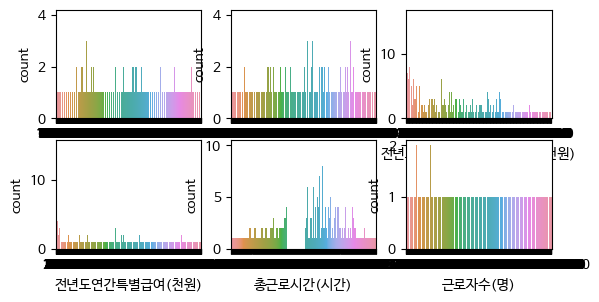

In [ ]:
plt.subplot(3, 3, 1)
sns.countplot(data = data, x = "월임금총액(천원)")

plt.subplot(3, 3, 2)
sns.countplot(data = data, x = "월급여액(천원)")

plt.subplot(3, 3, 3)
sns.countplot(data = data, x = "전년도연간특별급여/12개월(천원)")

plt.subplot(3, 3, 4)
sns.countplot(data = data, x = "전년도연간특별급여(천원)")

plt.subplot(3, 3, 5)
sns.countplot(data = data, x = "총근로시간(시간)")

plt.subplot(3, 3, 6)
sns.countplot(data = data, x = "근로자수(명)")
plt.show()

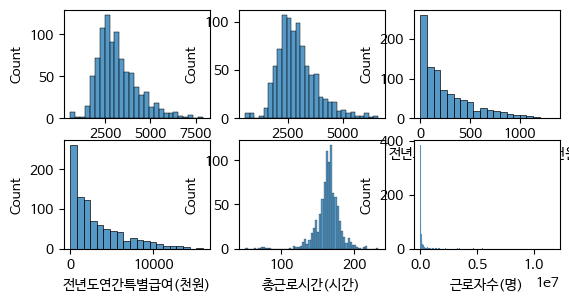

In [ ]:
plt.subplot(3, 3, 1)
sns.histplot(data = data, x = "월임금총액(천원)")

plt.subplot(3, 3, 2)
sns.histplot(data = data, x = "월급여액(천원)")

plt.subplot(3, 3, 3)
sns.histplot(data = data, x = "전년도연간특별급여/12개월(천원)")

plt.subplot(3, 3, 4)
sns.histplot(data = data, x = "전년도연간특별급여(천원)")

plt.subplot(3, 3, 5)
sns.histplot(data = data, x = "총근로시간(시간)")

plt.subplot(3, 3, 6)
sns.histplot(data = data, x = "근로자수(명)")
plt.show()

In [ ]:
data.describe()

,월임금총액(천원),월급여액(천원),전년도연간특별급여/12개월(천원),전년도연간특별급여(천원),총근로시간(시간),근로자수(명)
count,920.000000,920.000000,920.000000,920.000000,920.000000,9.200000e+02
mean,3201.392391,2941.243478,260.131522,3121.606522,163.841630,2.032510e+05
std,1126.708673,898.258690,265.609790,3187.235566,17.220843,6.322057e+05
min,593.000000,587.000000,0.000000,0.000000,50.600000,2.000000e+00
25%,2424.750000,2349.250000,52.000000,621.000000,157.600000,1.079850e+04
50%,2994.000000,2817.500000,165.500000,1985.500000,165.100000,4.538850e+04
75%,3768.750000,3386.250000,391.250000,4692.750000,172.300000,1.549982e+05
max,7880.000000,6588.000000,1333.000000,16000.000000,232.800000,1.168694e+07


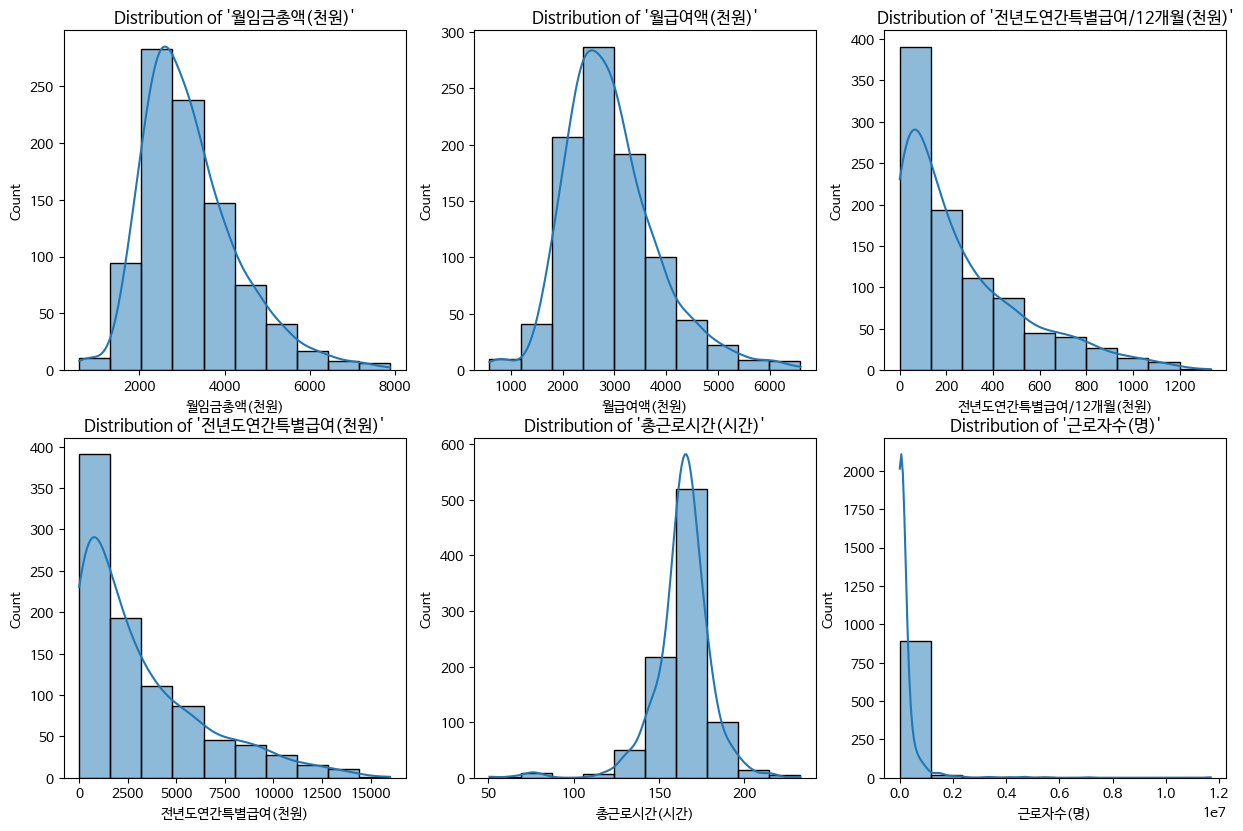

In [ ]:
plt.figure(figsize = (15, 15))
for i in range(len(num_columns)):
  plt.subplot(3, 3, i+1)
  sns.histplot(data = data, x = num_columns[i],
      bins = 10,
      kde = True,
      ).set(title = f"Distribution of '{num_columns[i]}'");

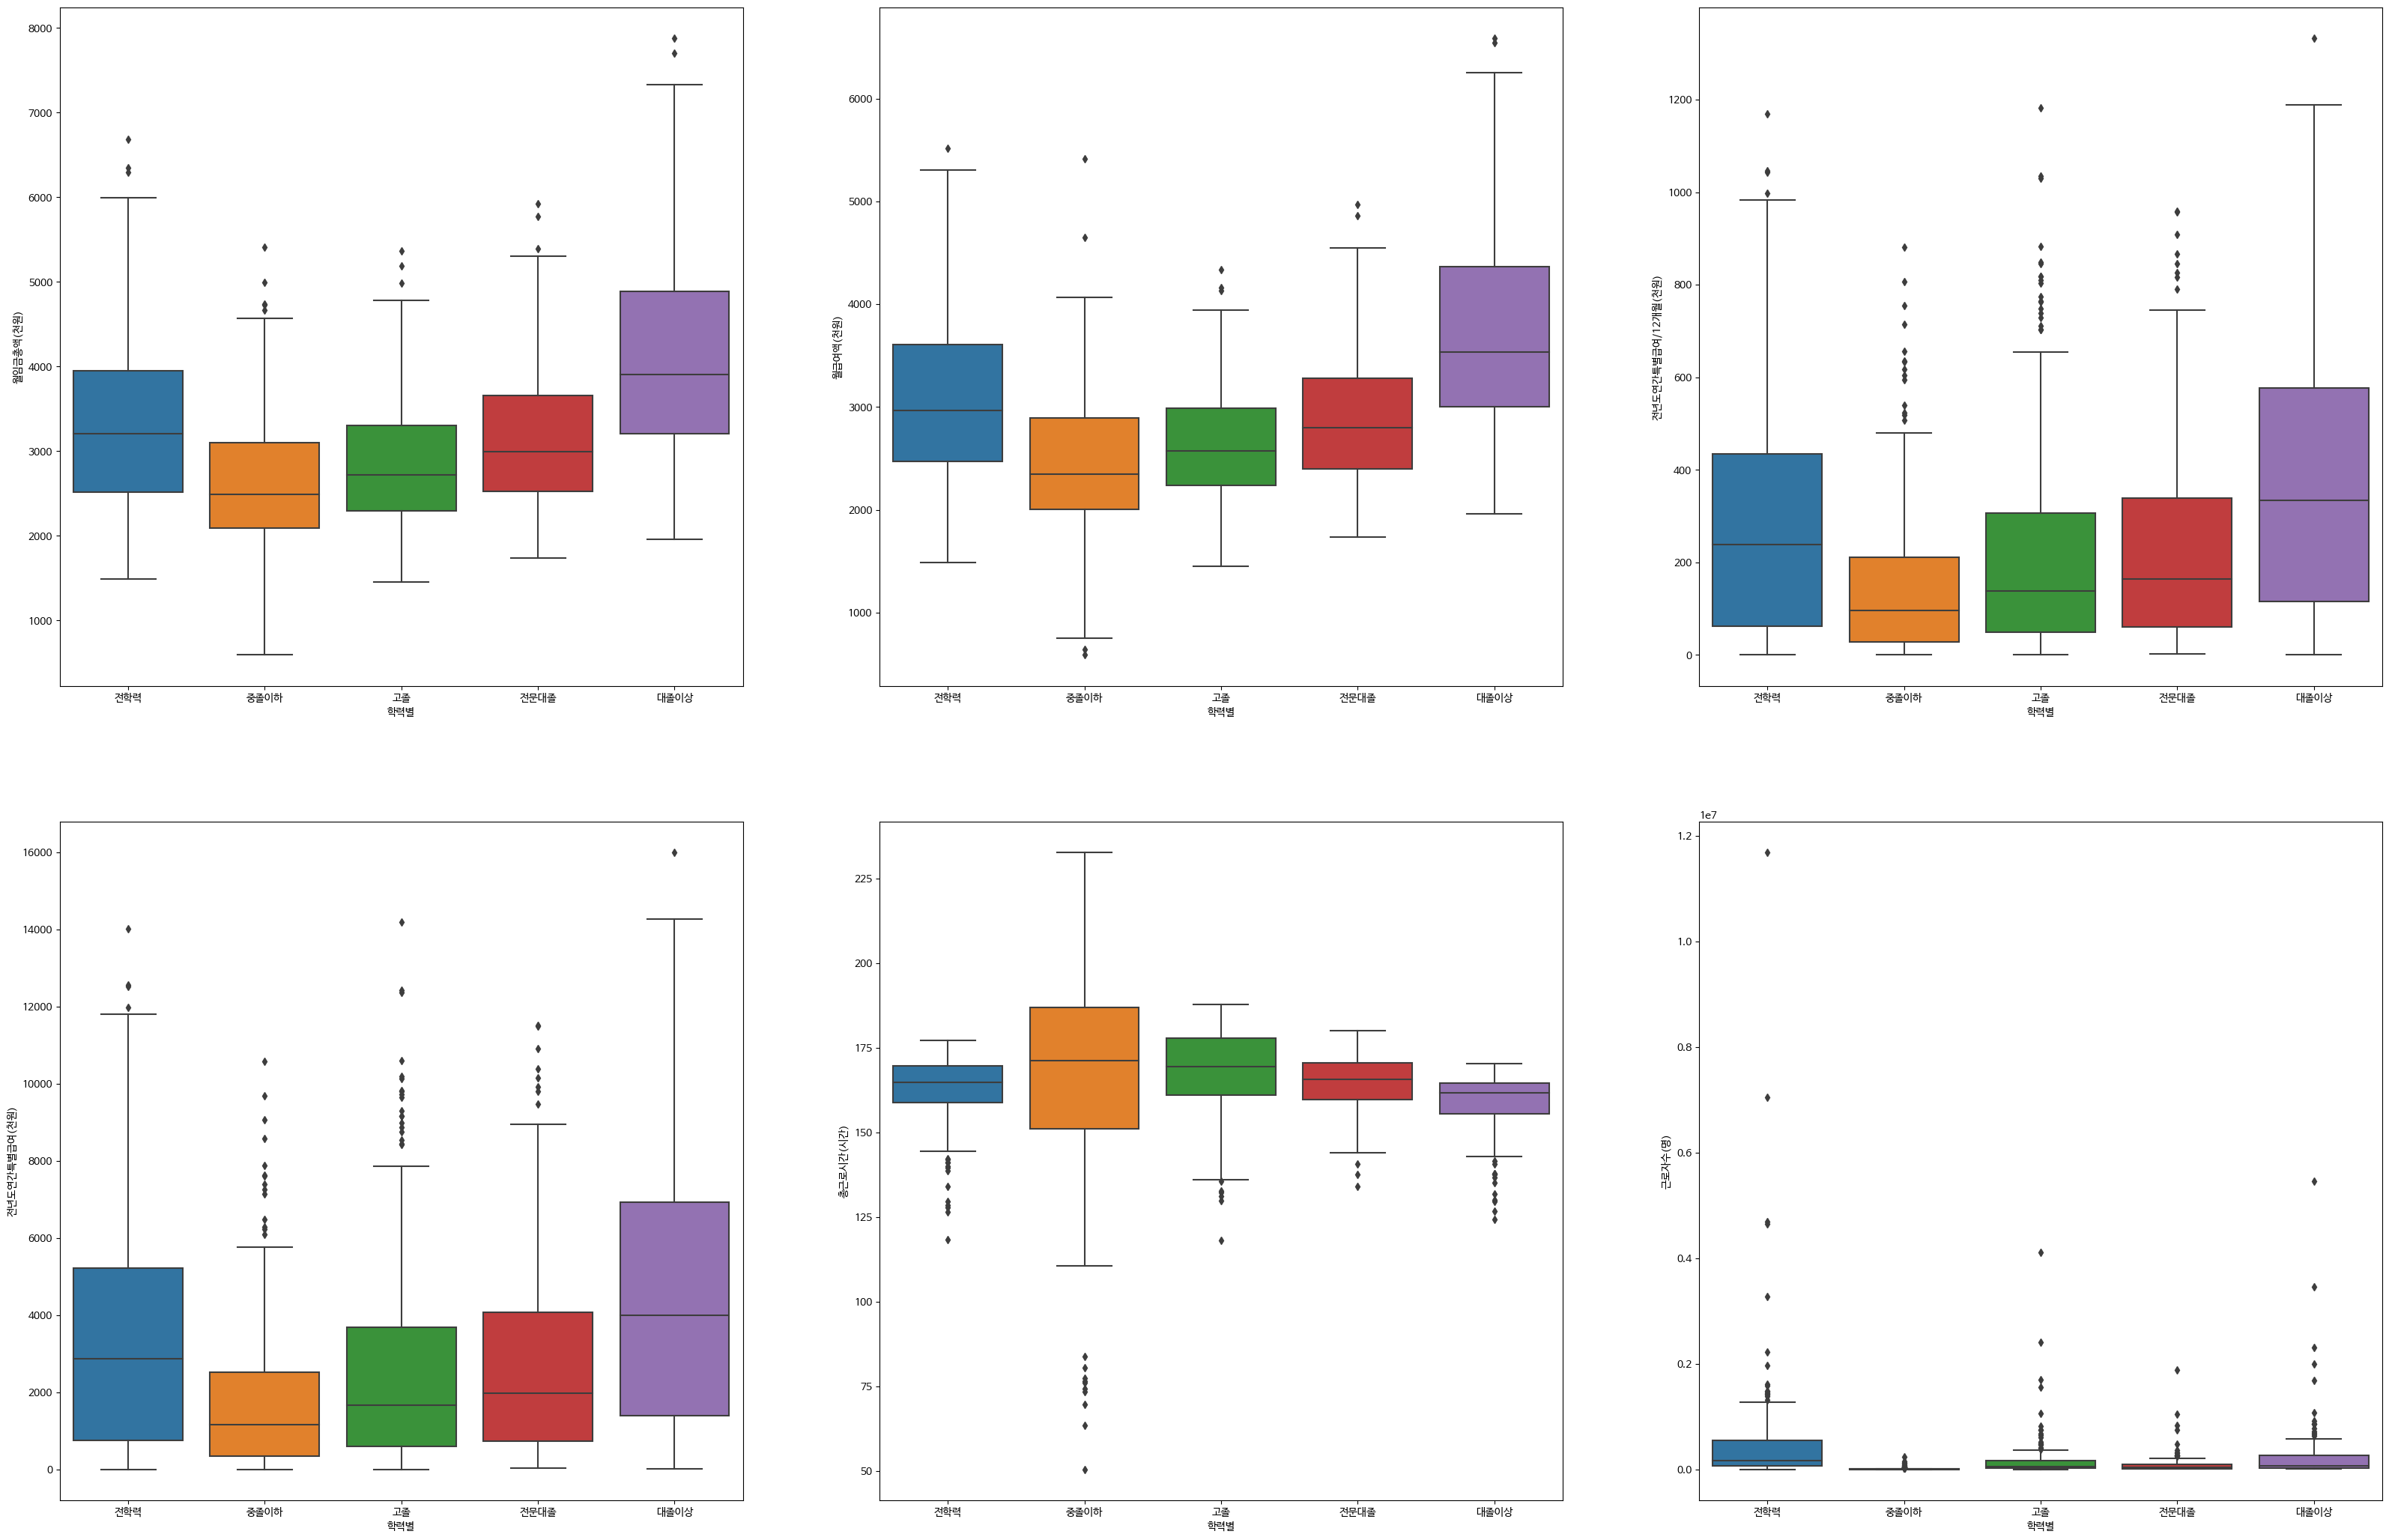

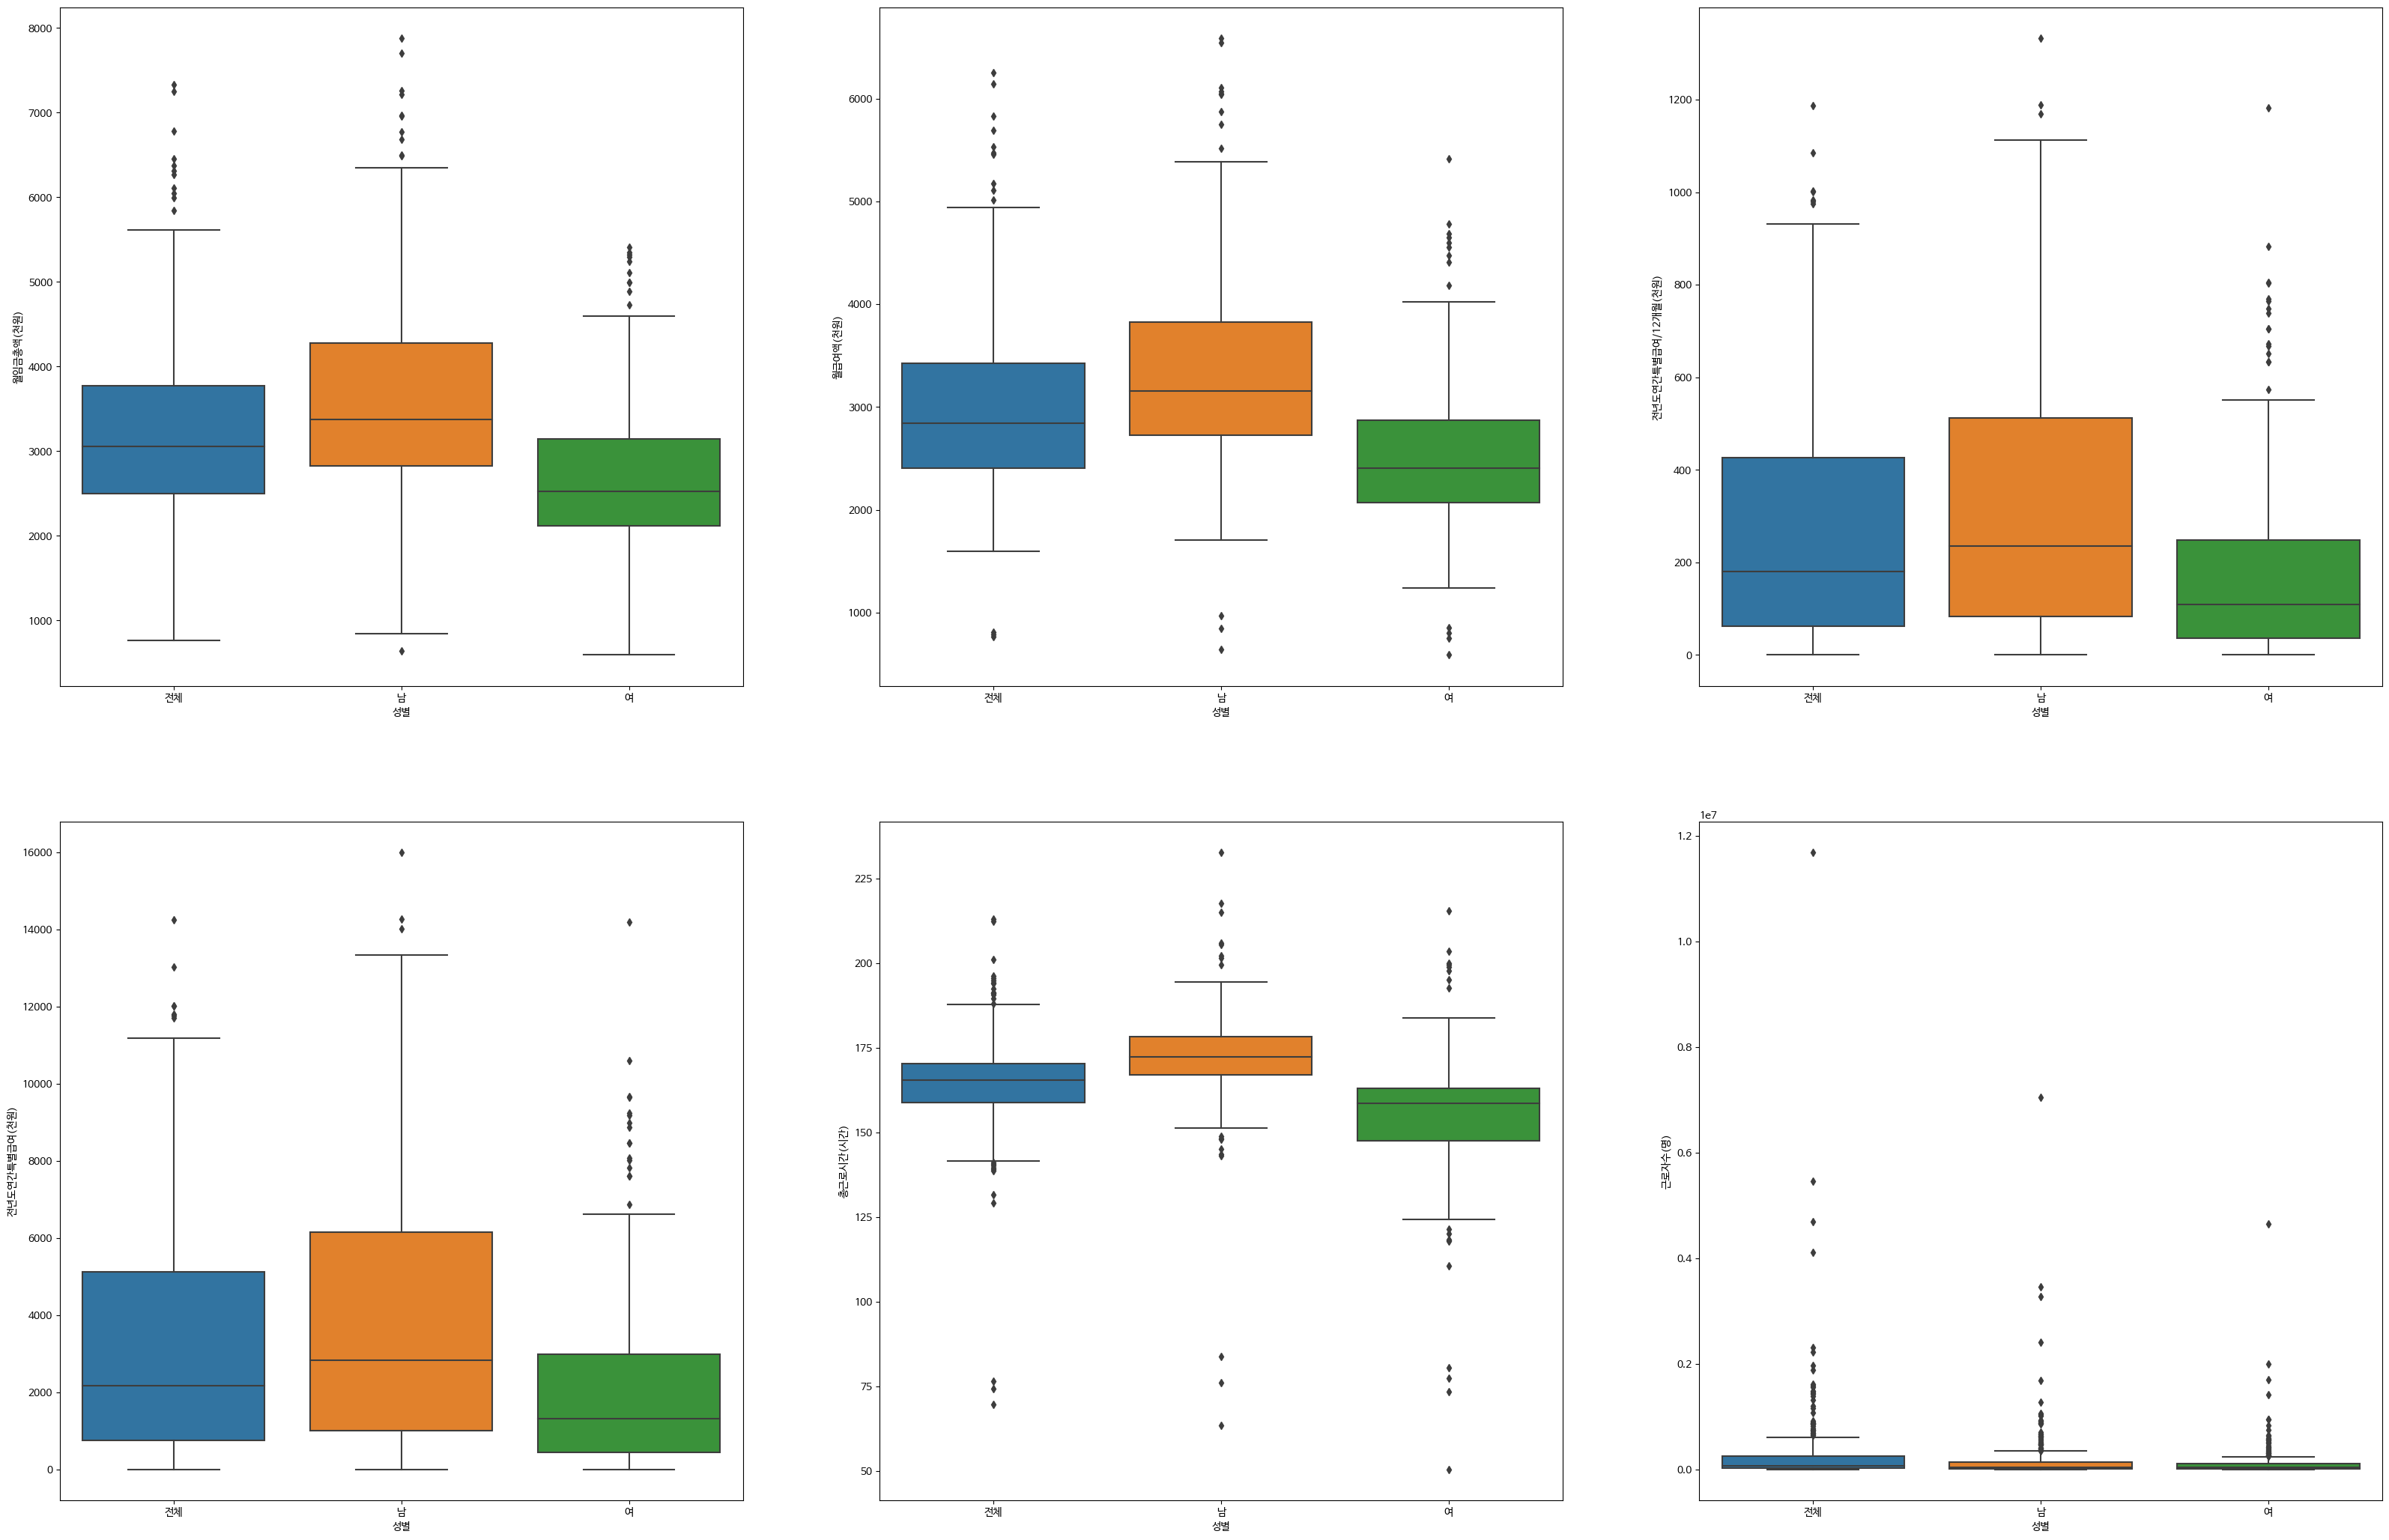

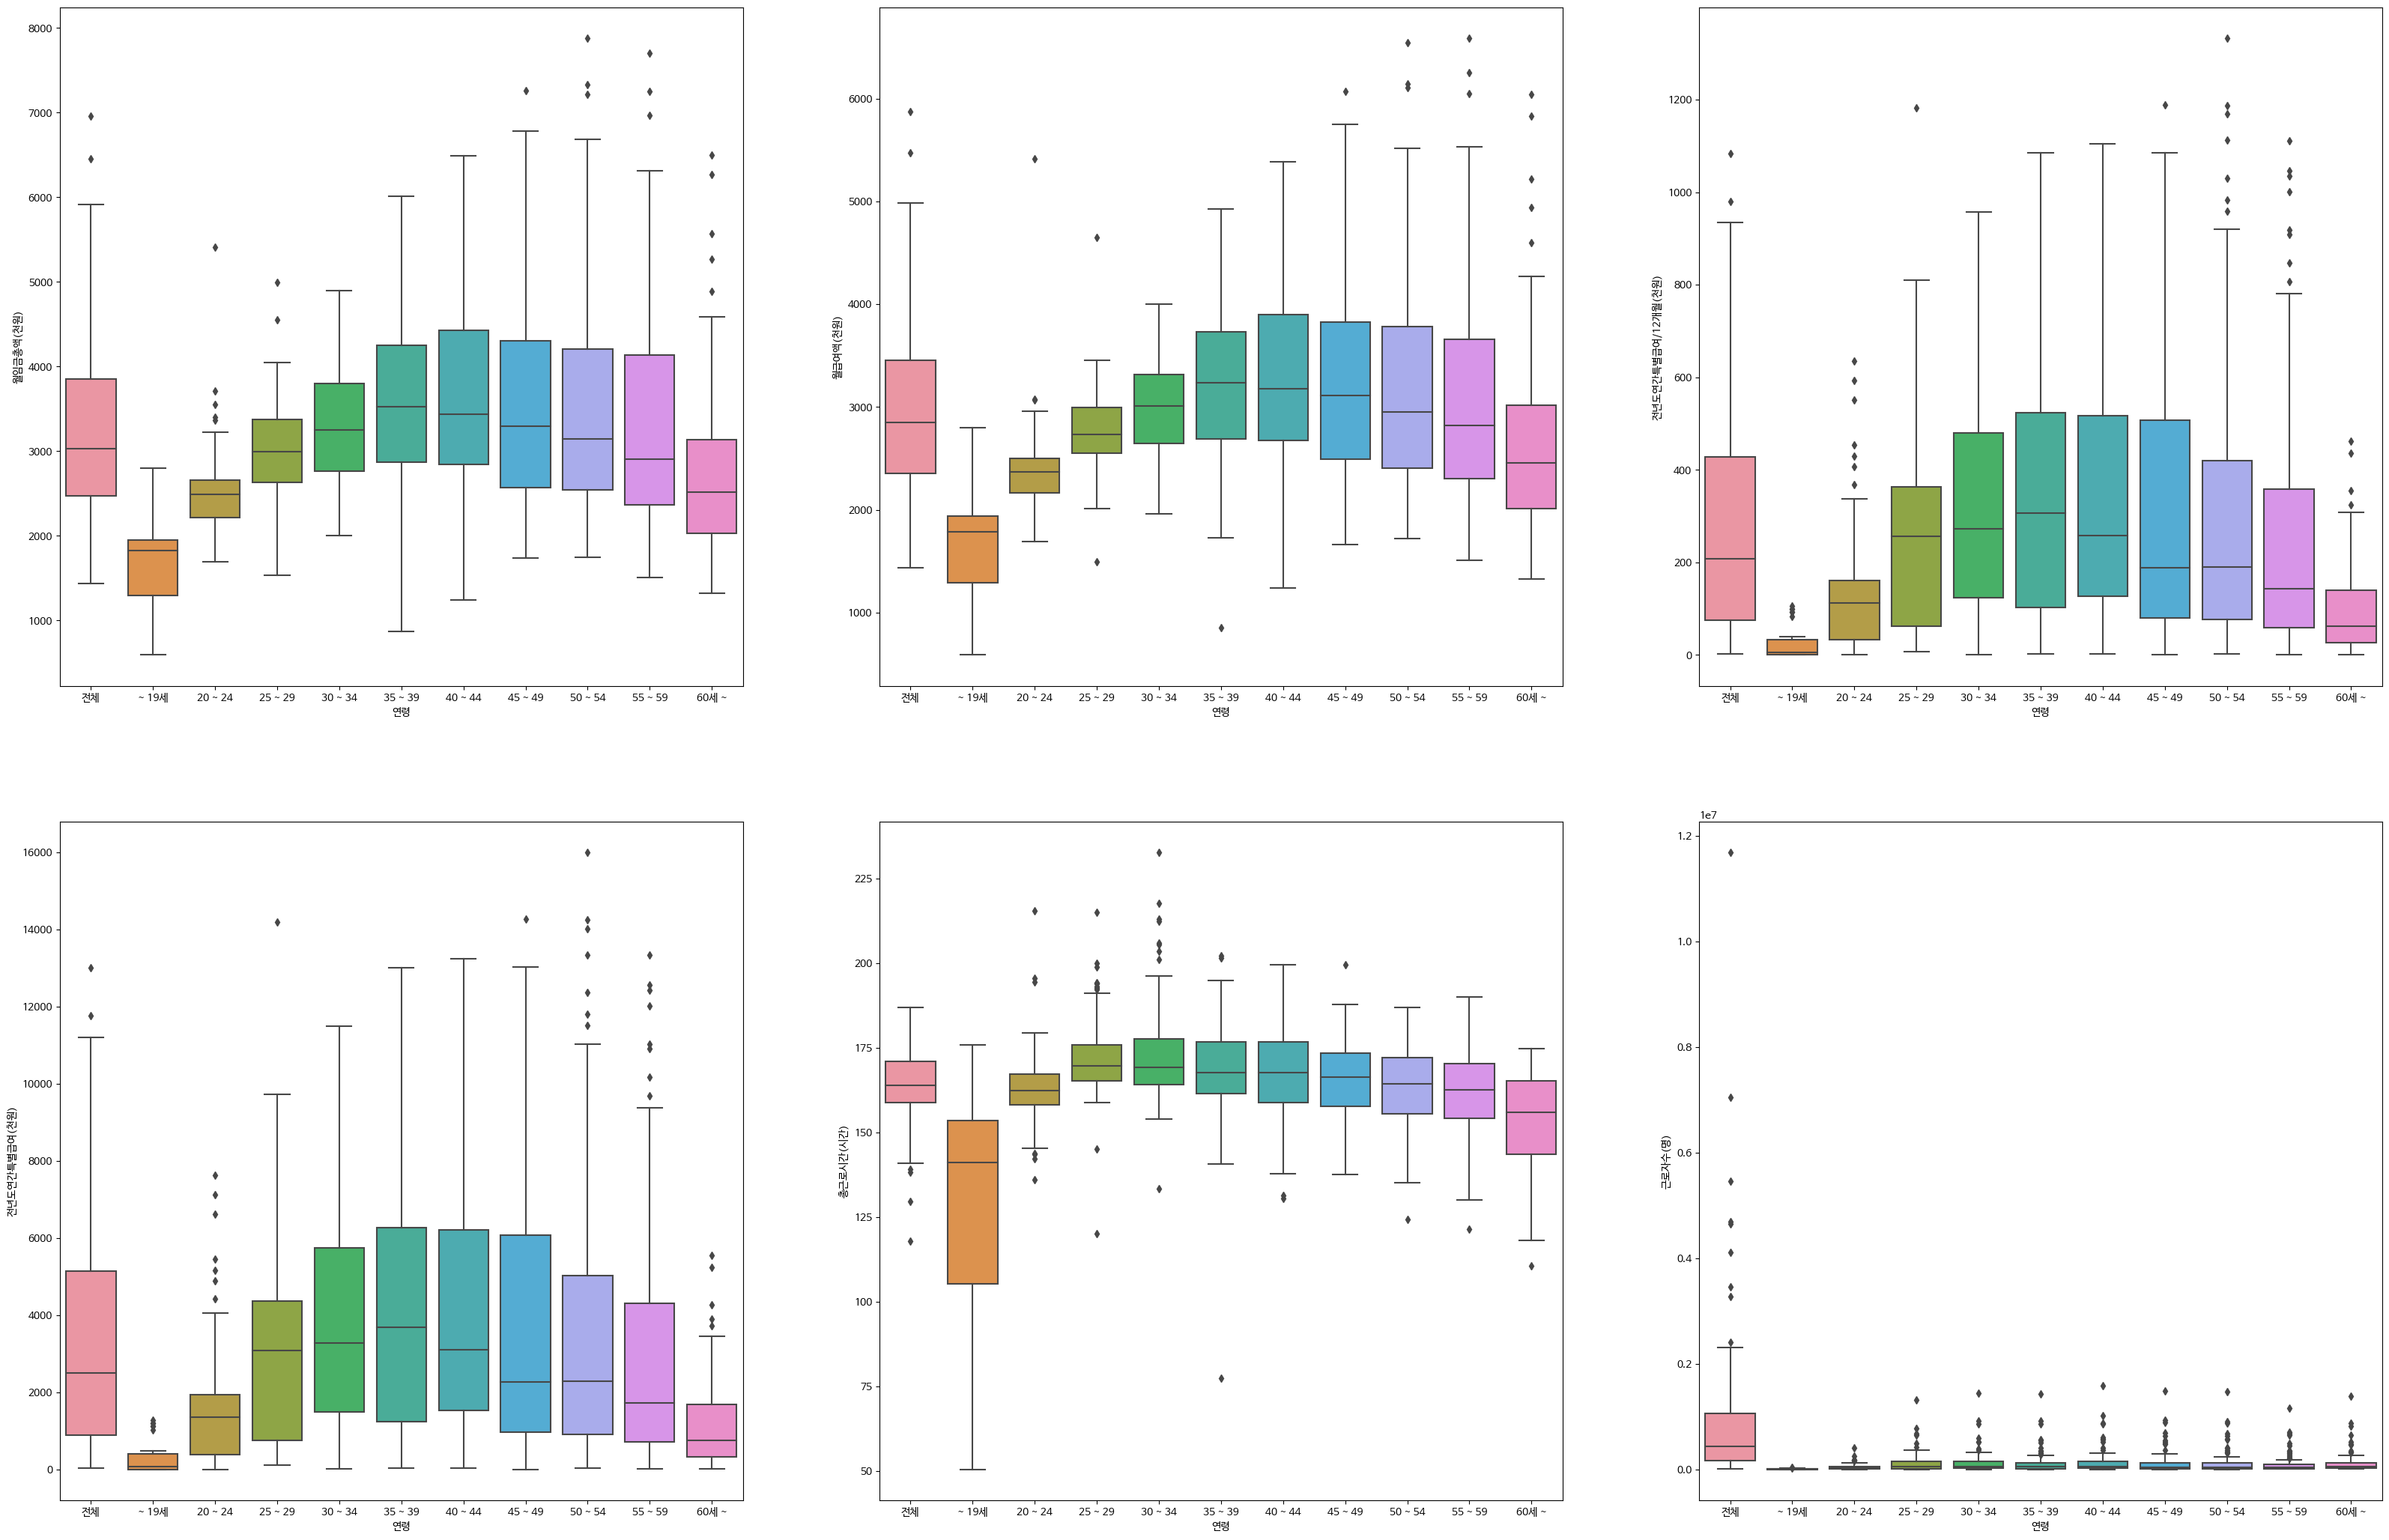

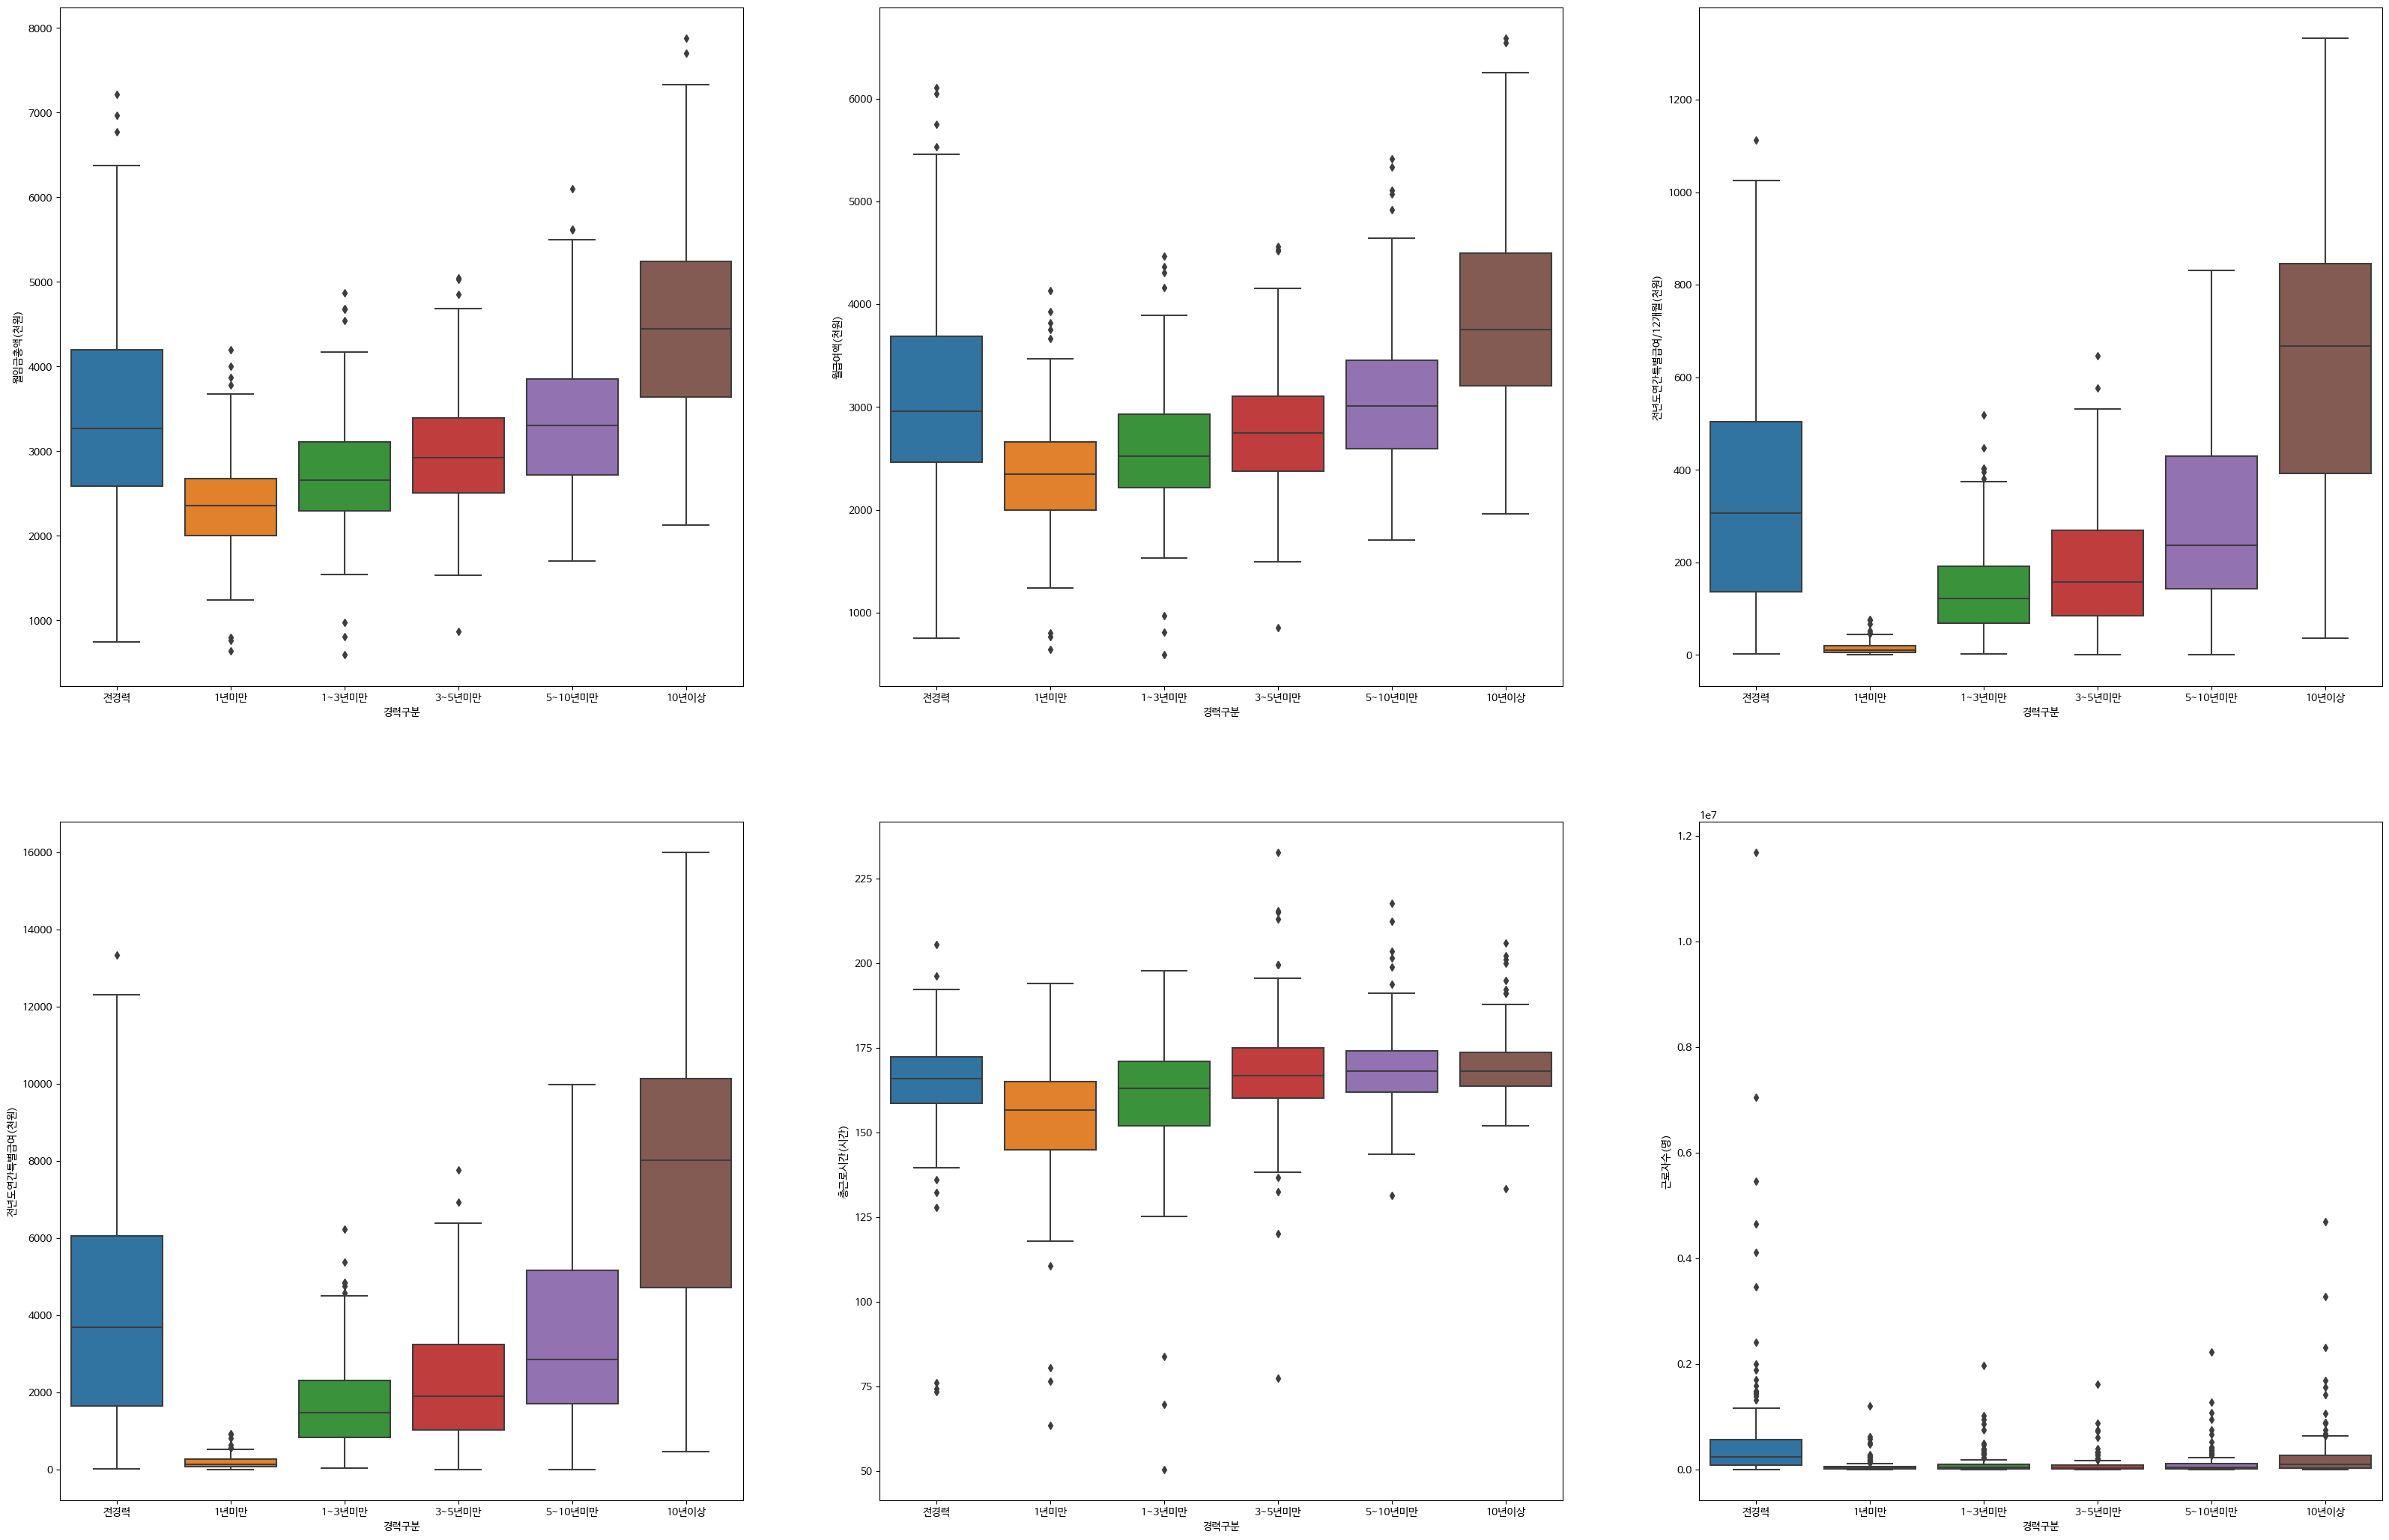

In [ ]:
plt.figure(figsize = (40, 40))
for i in range(len(num_columns)):
  ax = plt.subplot(3, 3, i+1)
  ax = sns.boxplot(data = data, x = "학력별", y = num_columns[i])

plt.figure(figsize = (40, 40))
for i in range(len(num_columns)):
  ax = plt.subplot(3, 3, i+1)
  ax = sns.boxplot(data = data, x = "성별", y = num_columns[i])

plt.figure(figsize = (40, 40))
for i in range(len(num_columns)):
  ax = plt.subplot(3, 3, i+1)
  ax = sns.boxplot(data = data, x = "연령", y = num_columns[i])

plt.figure(figsize = (40, 40))
for i in range(len(num_columns)):
  ax = plt.subplot(3, 3, i+1)
  ax = sns.boxplot(data = data, x = "경력구분", y = num_columns[i])

In [ ]:
ax = sns.PairGrid(data, diag_sharey=False, aspect=1.2, hue = "학력별")
ax.map_upper(sns.scatterplot)
ax.map_lower(sns.kdeplot)
ax.map_diag(sns.histplot)

ax = sns.PairGrid(data, diag_sharey=False, aspect=1.2, hue = "성별")
ax.map_upper(sns.scatterplot)
ax.map_lower(sns.kdeplot)
ax.map_diag(sns.histplot)

ax = sns.PairGrid(data, diag_sharey=False, aspect=1.2, hue = "연령")
ax.map_upper(sns.scatterplot)
ax.map_lower(sns.kdeplot)
ax.map_diag(sns.histplot)

ax = sns.PairGrid(data, diag_sharey=False, aspect=1.2, hue = "경력구분")
ax.map_upper(sns.scatterplot)
ax.map_lower(sns.kdeplot)
ax.map_diag(sns.histplot)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
corr_mat = np.round(data[num_columns].corr(), 4)
corr_mat_long = corr_mat.stack().reset_index(name="correlation")

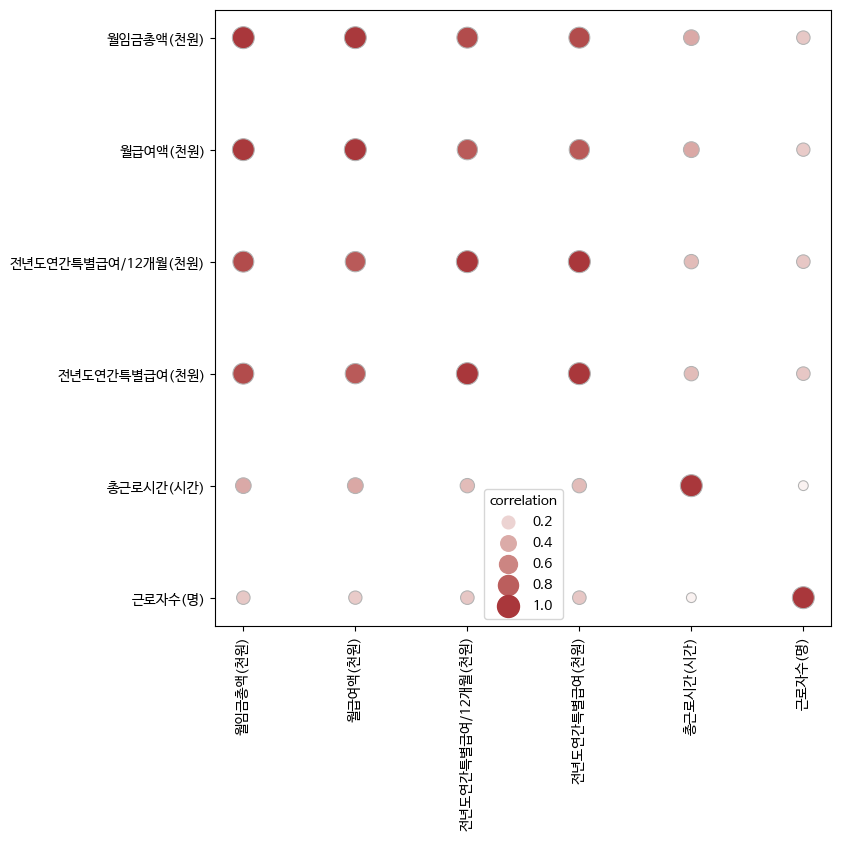

In [ ]:
plt.figure(figsize=(8, 8))

ax = sns.scatterplot(data=corr_mat_long, x="level_0", y="level_1", hue="correlation", palette="vlag", hue_norm=(-1, 1), edgecolor=".7", sizes=(50, 250), size="correlation")
ax.set(xlabel="", ylabel="", aspect="equal")
for label in ax.get_xticklabels():
  label.set_rotation(90)

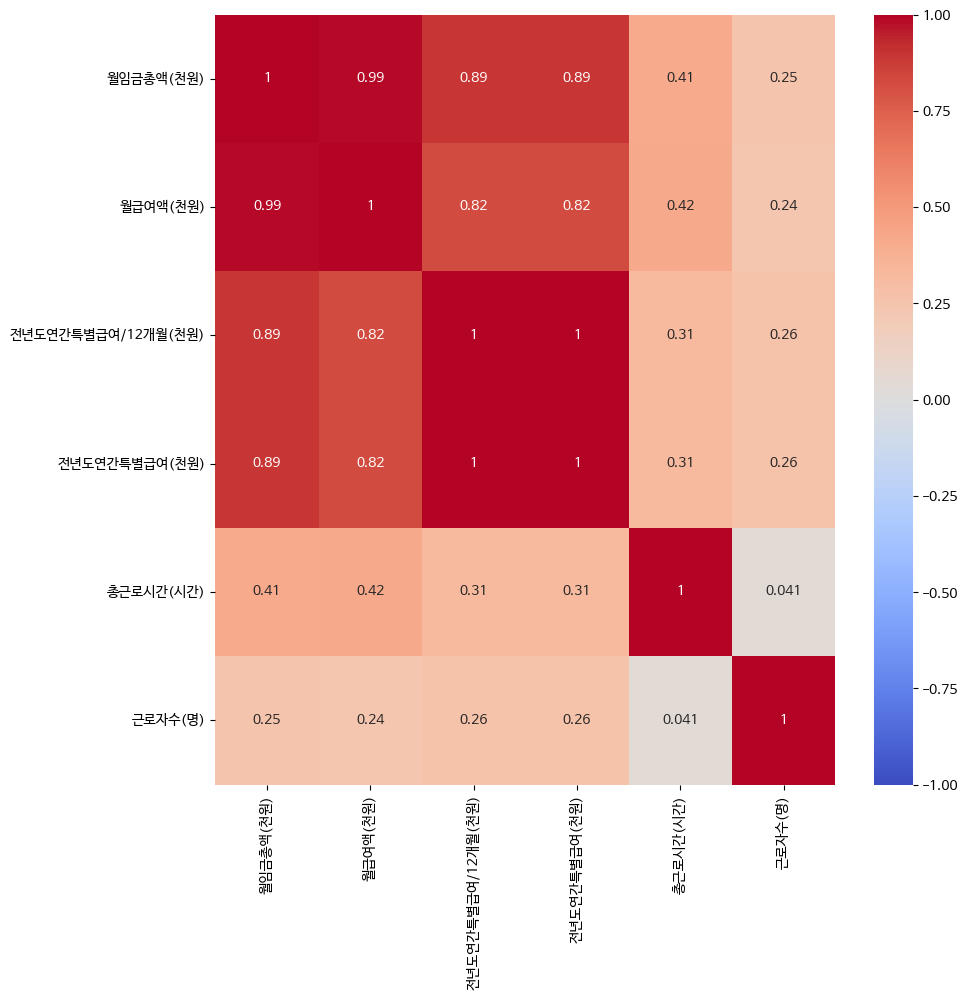

In [ ]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(corr_mat, vmin = -1, vmax = 1, annot = True, cmap = "coolwarm")
plt.show()

<Figure size 1000x1000 with 0 Axes>

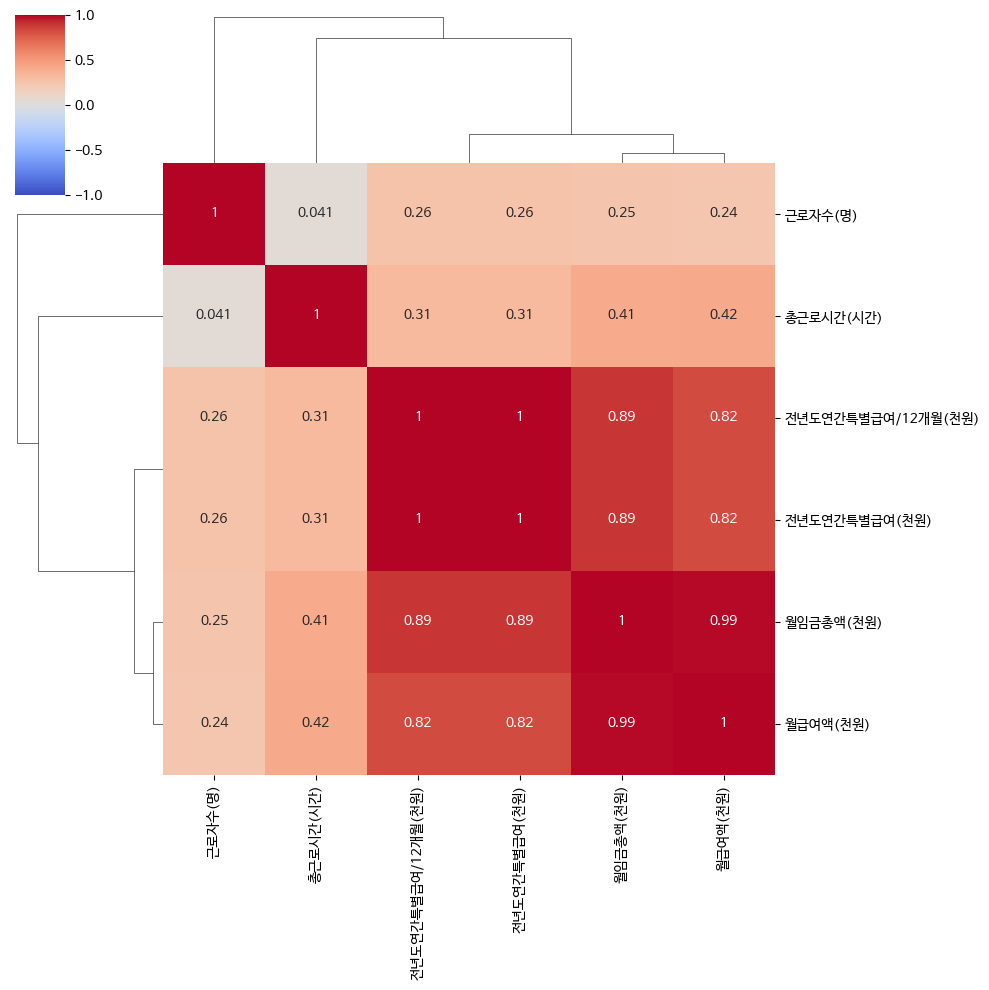

In [ ]:
plt.figure(figsize=(10, 10))
ax = sns.clustermap(corr_mat, vmin = -1, vmax = 1, annot = True, cmap = "coolwarm")